## Introduction
This data given by an airline organization. It includes customer feedback on various aspects of their service and flight data.

The main goal is to predict whether future customers will be satisfied based on these details.

We will  also utilize clustering algorithms to group the feedback based on the similarities or differences between the selected variables.

## Import Libraries & Read Data

In [1]:
# For data manipulation and analysis
import pandas as pd

# For numerical operations and handling arrays
import numpy as np

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# For encoding categorical variables 
from sklearn.preprocessing import LabelEncoder

# For splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# To streamline the process of sequentially applying data transformations and model training
from sklearn.pipeline import Pipeline

# For standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# For building a random forest model for classification tasks
from sklearn.ensemble import RandomForestClassifier

# For assessing model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For hyperparameter tuning using cross-validation
from sklearn.model_selection import GridSearchCV

# For K-Means clustering
from sklearn.cluster import KMeans

# For determining the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer

# For reducing the dimensionality of the dataset
from sklearn.decomposition import PCA 

# Ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv


In [3]:
# Read the dataset from the specified CSV file and store it in the 'df' variable
df = pd.read_csv('/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv')

## Exploratory Data Analysis
Exploratory data analysis (EDA) is a crucial step in the data analysis process, aimed at gaining initial insights into the data and understanding its characteristics.

Here are the typical steps involved in conducting EDA:

### Preliminary Examination

In [4]:
# Display the first 5 rows of the DataFrame
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
# Display the last 5 rows of the DataFrame
df.tail()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


In [6]:
# Returns a new DataFrame with duplicate rows removed
df = df.drop_duplicates()

In [7]:
# Get the shape of the DataFrame
df.shape

(129880, 23)

In [8]:
# Names of all the columns in the DataFrame
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [9]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

### Handle Missing Value

In [10]:
# Check the number of missing values in each column
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [11]:
# Count the occurrences of each unique value in the 'Arrival Delay in Minutes' column
df['Arrival Delay in Minutes'].value_counts()

Arrival Delay in Minutes
0.0       72753
1.0        2747
2.0        2587
3.0        2442
4.0        2373
          ...  
391.0         1
1584.0        1
422.0         1
333.0         1
500.0         1
Name: count, Length: 472, dtype: int64

In [12]:
# Drop rows with any missing values
df = df.dropna()

In [13]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### Summarizing Data

In [14]:
# Generate descriptive statistics for the numeric columns in the DataFrame
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Data Visualization

#### Pie Charts
Pie charts are useful when comparing the relative sizes of different categories or illustrating the composition of a whole. Each arc length in the chart corresponds to the proportion of a specific category, while the entire circle represents the total sum of all the data, equivalent to 100%.

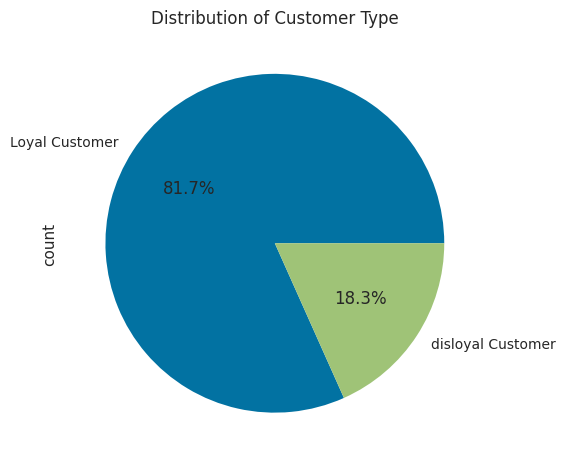

In [15]:
df['Customer Type'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Distribution of Customer Type');

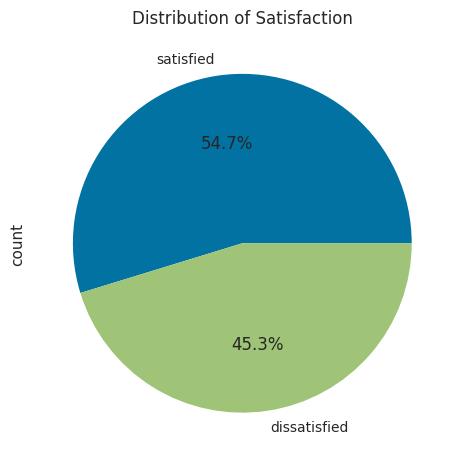

In [16]:
df['satisfaction'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Distribution of Satisfaction');

#### Box Plot
A box plot is a useful way to visually display the distribution of values in data. It provides a concise summary of key statistical measures and highlights any outliers present in the dataset. Box plots are particularly effective when comparing different categories or groups. The plot consists of a box that represents the interquartile range (IQR), which spans from the lower quartile (Q1) to the upper quartile (Q3). The median value is indicated by a line or another symbol within the box.

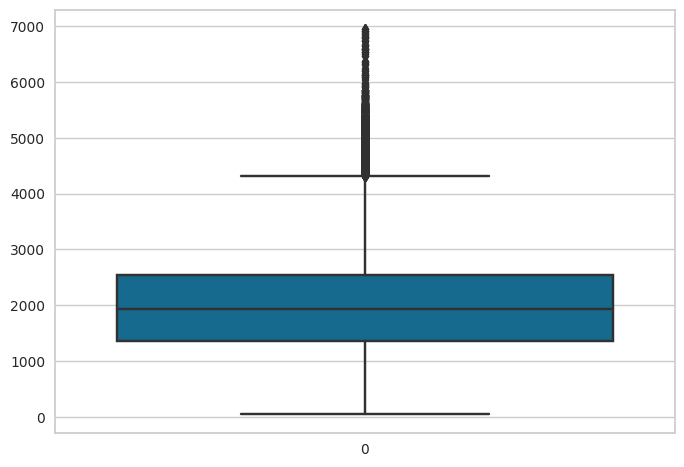

In [17]:
sns.boxplot(df['Flight Distance']);

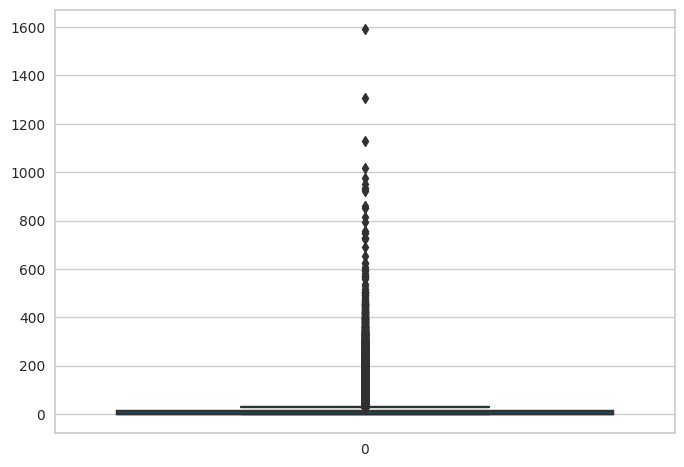

In [18]:
sns.boxplot(df['Departure Delay in Minutes']);

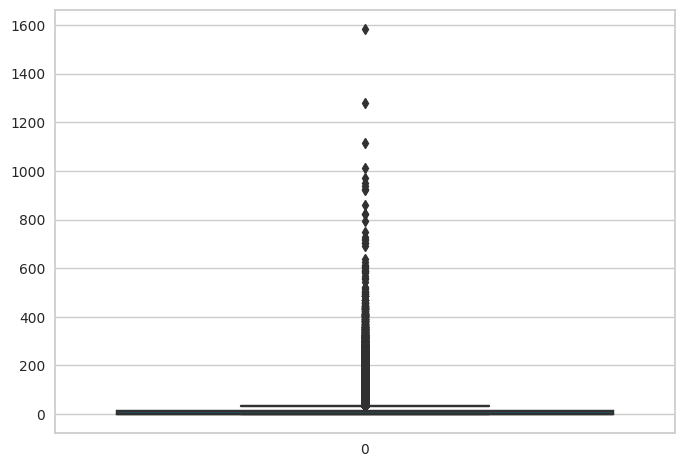

In [19]:
sns.boxplot(df['Arrival Delay in Minutes']);

#### Count Plot
The count plot is used to represent the occurrence(counts) of the observation present in the categorical variable.

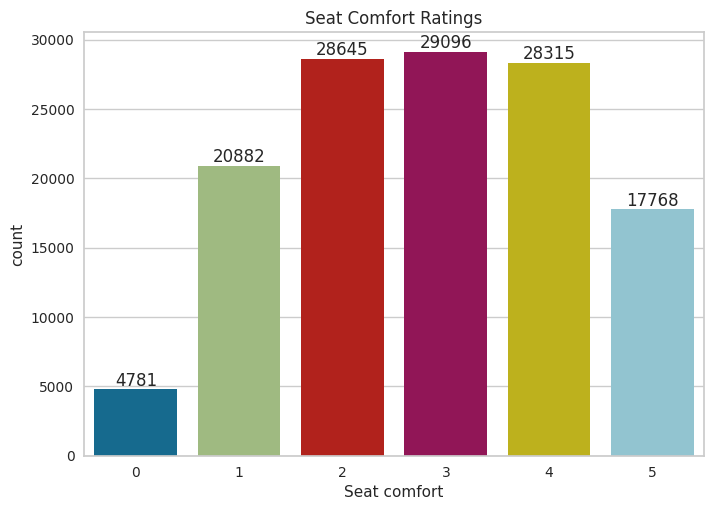

In [20]:
ax = sns.countplot(x = df['Seat comfort'])
ax.bar_label(ax.containers[0])
plt.title('Seat Comfort Ratings');

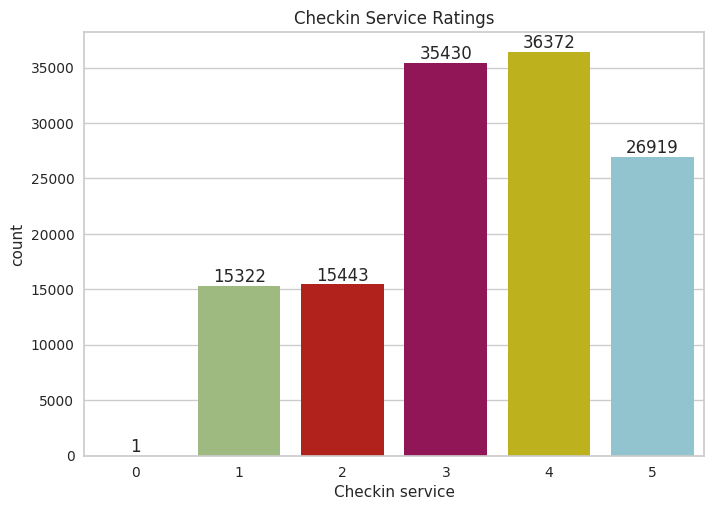

In [21]:
ax = sns.countplot(x = df['Checkin service'])
ax.bar_label(ax.containers[0])
plt.title('Checkin Service Ratings');

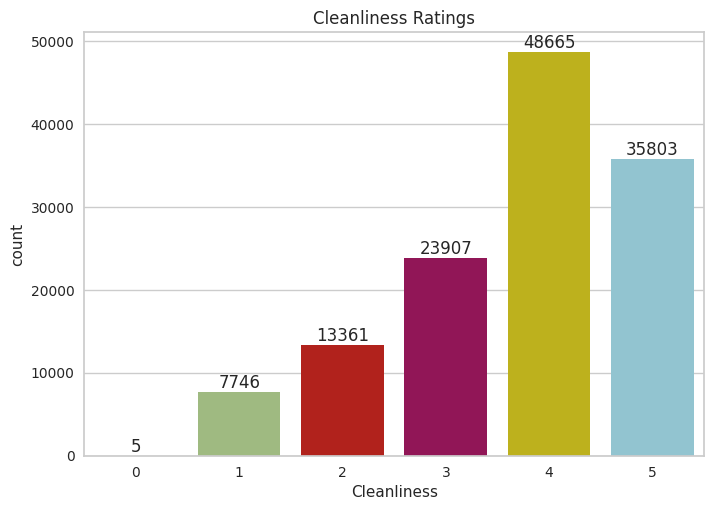

In [22]:
ax = sns.countplot(x = df['Cleanliness'])
ax.bar_label(ax.containers[0])
plt.title('Cleanliness Ratings');

### Correlation Analysis

In [23]:
# Calculate the correlation matrix for the numeric columns in the DataFrame
df.corr(numeric_only = True)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,-0.249438,0.008475,0.038905,0.015496,-0.000805,0.014037,0.130254,0.121287,0.071728,0.066510,0.083684,-0.015554,0.031556,-0.018605,0.037948,-0.009263,-0.011248
Flight Distance,-0.249438,1.000000,-0.042476,0.001381,-0.004806,-0.002322,0.012314,-0.027344,-0.031860,-0.022326,-0.032422,-0.030220,0.019653,0.002531,0.009391,0.009674,0.111608,0.110103
Seat comfort,0.008475,-0.042476,1.000000,0.434945,0.716008,0.405358,0.129152,0.426488,0.120153,0.211576,0.121183,0.136161,0.118557,0.041265,0.108681,0.130365,-0.023842,-0.025506
Departure/Arrival time convenient,0.038905,0.001381,0.434945,1.000000,0.527575,0.544311,-0.001558,0.077262,-0.000470,0.001853,0.060104,0.029416,0.067201,0.062927,0.067021,-0.000495,0.004197,0.002599
Food and drink,0.015496,-0.004806,0.716008,0.527575,1.000000,0.523530,0.026077,0.367777,0.028503,0.041150,0.038578,0.073975,0.036307,0.011912,0.033313,0.013620,-0.013375,-0.014881
Gate location,-0.000805,-0.002322,0.405358,0.544311,0.523530,1.000000,-0.003949,-0.000430,0.002679,0.001365,-0.025346,-0.007462,-0.000345,-0.031809,-0.001789,-0.003141,0.003997,0.003640
Inflight wifi service,0.014037,0.012314,0.129152,-0.001558,0.026077,-0.003949,1.000000,0.253941,0.557548,0.601074,0.060854,0.033636,0.038339,0.092402,0.038513,0.631800,-0.033010,-0.035270
Inflight entertainment,0.130254,-0.027344,0.426488,0.077262,0.367777,-0.000430,0.253941,1.000000,0.441844,0.321891,0.184083,0.160616,0.117286,0.224130,0.109420,0.355692,-0.030325,-0.033321
Online support,0.121287,-0.031860,0.120153,-0.000470,0.028503,0.002679,0.557548,0.441844,1.000000,0.617642,0.158006,0.138258,0.102399,0.206641,0.095773,0.669886,-0.033694,-0.036087
Ease of Online booking,0.071728,-0.022326,0.211576,0.001853,0.041150,0.001365,0.601074,0.321891,0.617642,1.000000,0.436439,0.355274,0.398457,0.137896,0.418073,0.684329,-0.036647,-0.039806


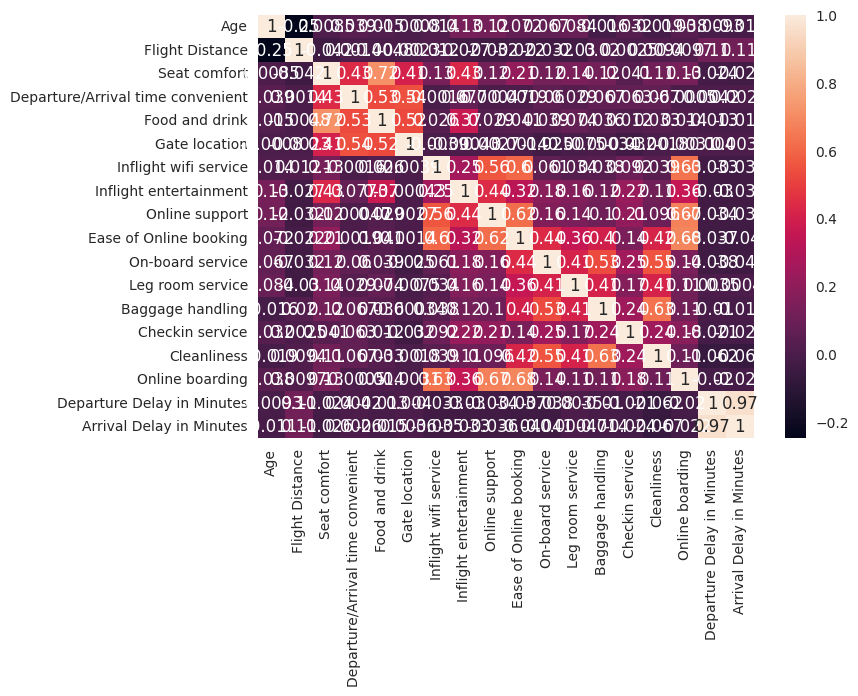

In [24]:
# Create a heatmap visualization of the correlation matrix
sns.heatmap(df.corr(numeric_only = True), annot = True);

## Supervised Learning - Classification

Supervised learning helps the model learn from labeled data to make accurate predictions.

Supervised learning is classified  into two categories of algorithms: Regression and Classification. We will examine the classification.
The main objective of classification is to build a model that can accurately assign a label or category to a new observation based on its features.
There are several classification algorithms. We will use the Random Forest Classifier.

### Data Preparation
Data preparation is the process of cleaning and organizing raw data into a usable format for analysis or modeling.

In [25]:
# Creating an instance of the LabelEncoder class and assigning it to the variable 'label_encoder'
label_encoder = LabelEncoder()

# Apply the LabelEncoder to the 'satisfaction' column of the DataFrame
df['satisfaction'] = LabelEncoder().fit_transform(df['satisfaction'])

# Apply the LabelEncoder to the 'Customer Type' column of the DataFrame
df['Customer Type'] = LabelEncoder().fit_transform(df['Customer Type'])

# Apply the LabelEncoder to the 'Class' column of the DataFrame
df['Class'] = LabelEncoder().fit_transform(df['Class'])

In [26]:
# Calculate the absolute values of the correlation coefficients 
# between the 'satisfaction' column and other numeric columns, sorted in descending order
abs(df.corr(numeric_only = True)['satisfaction'].sort_values(ascending = False))

satisfaction                         1.000000
Inflight entertainment               0.523364
Ease of Online booking               0.432017
Online support                       0.389890
On-board service                     0.352283
Online boarding                      0.338118
Leg room service                     0.305115
Checkin service                      0.266089
Baggage handling                     0.260398
Cleanliness                          0.259504
Seat comfort                         0.242371
Inflight wifi service                0.227010
Food and drink                       0.120568
Age                                  0.117913
Gate location                        0.012272
Departure/Arrival time convenient    0.015624
Flight Distance                      0.039133
Departure Delay in Minutes           0.073960
Arrival Delay in Minutes             0.080691
Class                                0.278937
Customer Type                        0.292563
Name: satisfaction, dtype: float64

In [27]:
# Create a feature matrix 'x' that contains all the independent variables (features) that will be used for modeling, 
# excluding the 'satisfaction','Gender','Age','Gate location','Departure/Arrival time convenient','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes' and 'Type of Travel' columns 
x = df.drop(['satisfaction','Gender','Age','Gate location','Departure/Arrival time convenient','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Type of Travel'],axis = 1)
# The 'axis=1' parameter specifies that the columns should be dropped, rather than rows

# Create a target variable 'y' that will be used as the dependent variable in the modeling process
y = df[['satisfaction']]

In [28]:
# Split the data into training and testing sets
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# The test_size=0.20 parameter specifies that the test set should comprise 20% of the total data
# The random_state=42 parameter ensures that the same random split is obtained every time the code is run, by fixing the random seed

### Data Modeling
A machine learning pipeline was established to streamline the workflow. This pipeline allowed for the integration of multiple steps, such as data preprocessing and model training, into a single process.

The chosen model was trained on the training dataset. This step enabled the model to learn the underlying patterns and relationships in the data.

After training, predictions were made on new, unseen data. 


In [29]:
# Define pipeline steps
steps = [
    ('scaler', StandardScaler()),                  
    ('random_forest_classifier', RandomForestClassifier())      
]

In [30]:
# Create the pipeline
pipeline = Pipeline(steps)

In [31]:
# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest_classifier', RandomForestClassifier())])

In [32]:
# Use the trained pipeline to make predictions on the test set
predictions = pipeline.predict(x_test)

### Model Evaluation
Various metrics are used to measure the model's accuracy.

Confusion matrix provides a comprehensive summary of the model’s predictions and the actual classes or categories of the data.


In [33]:
# Calculate the confusion matrix for the predicted values 'predictions' and the actual target variable values 'y_test'
confusion_matrix(predictions, y_test)

array([[11119,   763],
       [  702, 13314]])

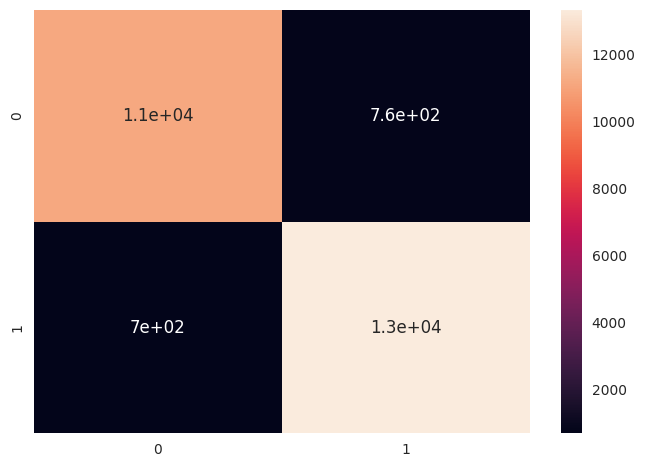

In [34]:
# Create a heatmap visualization of the confusion matrix
sns.heatmap(confusion_matrix(predictions, y_test),annot = True);

In [35]:
# Print the classification report for the  model
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11882
           1       0.95      0.95      0.95     14016

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



### Hyperparameter Tuning
Hyperparameter tuning is the process of optimizing the parameters of a machine learning model that are not learned from the data during training. These parameters control the learning process and can significantly impact model performance.

In [36]:
# Define the parameter grid
param_grid = {
    'random_forest_classifier__n_estimators': [50, 100, 200],
    'random_forest_classifier__max_depth': [None, 10, 20, 30],
    'random_forest_classifier__min_samples_split': [2, 5, 10]
}

In [37]:
# Set up the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = 'accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('random_forest_classifier',
                                        RandomForestClassifier())]),
             param_grid={'random_forest_classifier__max_depth': [None, 10, 20,
                                                                 30],
                         'random_forest_classifier__min_samples_split': [2, 5,
                                                                         10],
                         'random_forest_classifier__n_estimators': [50, 100,
                                                                    200]},
             scoring='accuracy')

In [38]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'random_forest_classifier__max_depth': None, 'random_forest_classifier__min_samples_split': 10, 'random_forest_classifier__n_estimators': 100}
Best Score: 0.942522855094612


#### Predicting "satisfaction" based on features:

In [39]:
# features: 'Customer Type', 'Class', 'Seat comfort', 'Food and drink',
#       'Inflight wifi service', 'Inflight entertainment', 'Online support',
#       'Ease of Online booking', 'On-board service', 'Leg room service',
#       'Baggage handling', 'Checkin service', 'Cleanliness',
#       'Online boarding'
features=[[1, 1, 5, 5, 3, 3, 4, 3, 4, 4, 3, 5, 4, 3]]
pipeline.predict(features).round()

array([1])

### Conclusion:
The model demonstrates strong performance in predicting customer satisfaction, with high precision, recall, and F1-scores for both classes. 

## Unsupervised Learning - Clustering
Unsupervised learning is a type of machine learning that learns from unlabeled data.

The most common unsupervised learning task is clustering, which involves identifying and grouping related data points in large datasets without any prior knowledge of the specific outcomes. Clustering algorithms, such as k-means is used to partition the data into meaningful subgroups or clusters.

In [40]:
# Selecting specific columns from the DataFrame 'df'
x = df[['Seat comfort', 'Food and drink',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']]

In [41]:
# Standardize the Data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [42]:
scaled_x

array([[-2.03794343, -1.97565792, -0.9472235 , ...,  1.31630075,
        -0.61291868, -1.04152574],
       [-2.03794343, -1.97565792, -2.46380006, ..., -1.06360145,
        -0.61291868, -1.04152574],
       [-2.03794343, -1.97565792, -0.9472235 , ...,  0.52300002,
         0.25537887, -1.04152574],
       ...,
       [ 0.11588599,  0.10250631, -0.18893522, ..., -1.06360145,
        -0.61291868, -1.04152574],
       [ 0.11588599,  0.10250631, -0.18893522, ..., -1.06360145,
        -2.34951377, -1.04152574],
       [ 0.11588599,  0.10250631, -0.18893522, ..., -0.27030071,
        -0.61291868, -0.2714769 ]])

In [43]:
# Convert the scaled data to a DataFrame
scaled_x_df = pd.DataFrame(scaled_x)

# Initialize a list to store inertia values
results = []

# Loop over a range of cluster numbers
for i in range (2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_x_df)
    results.append(kmeans.inertia_)

# Display the inertia values
results

[1194902.7080152072,
 1059430.167547164,
 967810.615252602,
 912997.2969597387,
 865335.4454002723,
 824633.3326024751,
 796412.6641051094,
 771707.205647338]

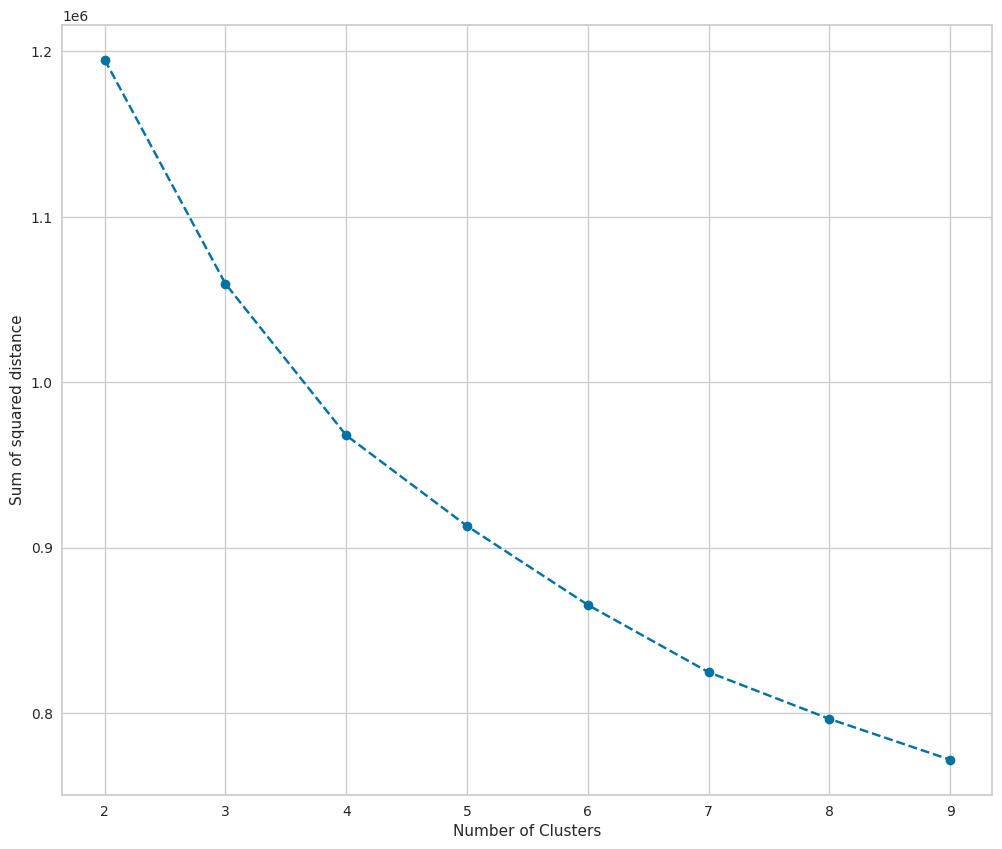

In [44]:
# Plotting the results
plt.figure(figsize=(12, 10))
plt.plot(np.arange(2,10), results, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance');

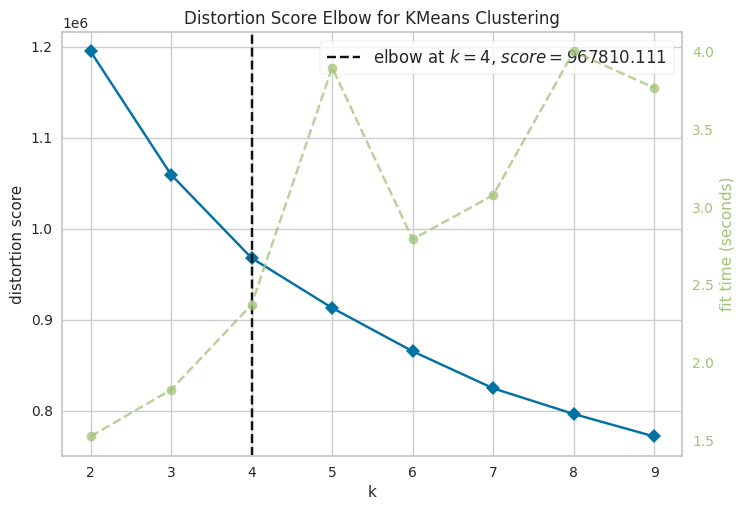

In [45]:
km=KMeans()
# Create the KElbowVisualizer
vis=KElbowVisualizer(km, k=(2,10))
vis.fit(scaled_x_df)
vis.show();

In [46]:
# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
# Fit the model to the scaled data
kmeans.fit(scaled_x_df)

KMeans(n_clusters=4, random_state=42)

In [47]:
# Create a copy of the original DataFrame
df_kmeans = df.copy()
# Add the cluster labels to the new DataFrame
df_kmeans['Cluster'] = kmeans.labels_
# Display the updated DataFrame with clusters
df_kmeans

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Cluster
0,1,Female,0,65,Personal Travel,1,265,0,0,0,...,3,3,0,3,5,3,2,0,0.0,0
1,1,Male,0,47,Personal Travel,0,2464,0,0,0,...,3,4,4,4,2,3,2,310,305.0,0
2,1,Female,0,15,Personal Travel,1,2138,0,0,0,...,2,3,3,4,4,4,2,0,0.0,0
3,1,Female,0,60,Personal Travel,1,623,0,0,0,...,1,1,0,1,4,1,3,0,0.0,3
4,1,Female,0,70,Personal Travel,1,354,0,0,0,...,2,2,0,2,4,2,5,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,Female,1,29,Personal Travel,1,1731,5,5,5,...,2,3,3,4,4,4,2,0,0.0,0
129876,0,Male,1,63,Personal Travel,0,2087,2,3,2,...,3,2,3,3,1,2,1,174,172.0,0
129877,0,Male,1,69,Personal Travel,1,2320,3,0,3,...,4,4,3,4,2,3,2,155,163.0,0
129878,0,Male,1,66,Personal Travel,1,2450,3,2,3,...,3,3,2,3,2,1,2,193,205.0,3


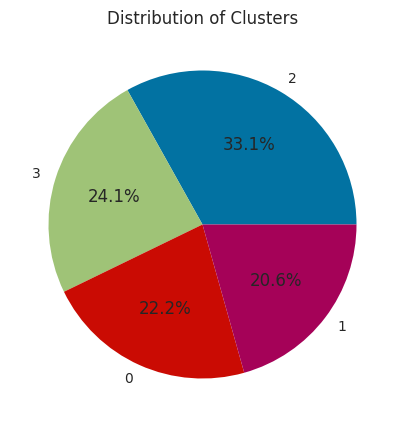

In [48]:
# Get the cluster counts
cluster_counts = df_kmeans['Cluster'].value_counts()

# Create the pie chart
plt.figure(figsize=(10,5))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Distribution of Clusters');

In [49]:
# Filter the DataFrame 'df_kmeans' to get the rows where 'cluster' is 0
cluster0=df_kmeans[df_kmeans['Cluster']==0]
# Filter the DataFrame 'df_kmeans' to get the rows where 'cluster' is 1
cluster1=df_kmeans[df_kmeans['Cluster']==1]
# Filter the DataFrame 'df_kmeans' to get the rows where 'cluster' is 2
cluster2=df_kmeans[df_kmeans['Cluster']==2]
# Filter the DataFrame 'df_kmeans' to get the rows where 'cluster' is 3
cluster3=df_kmeans[df_kmeans['Cluster']==3]

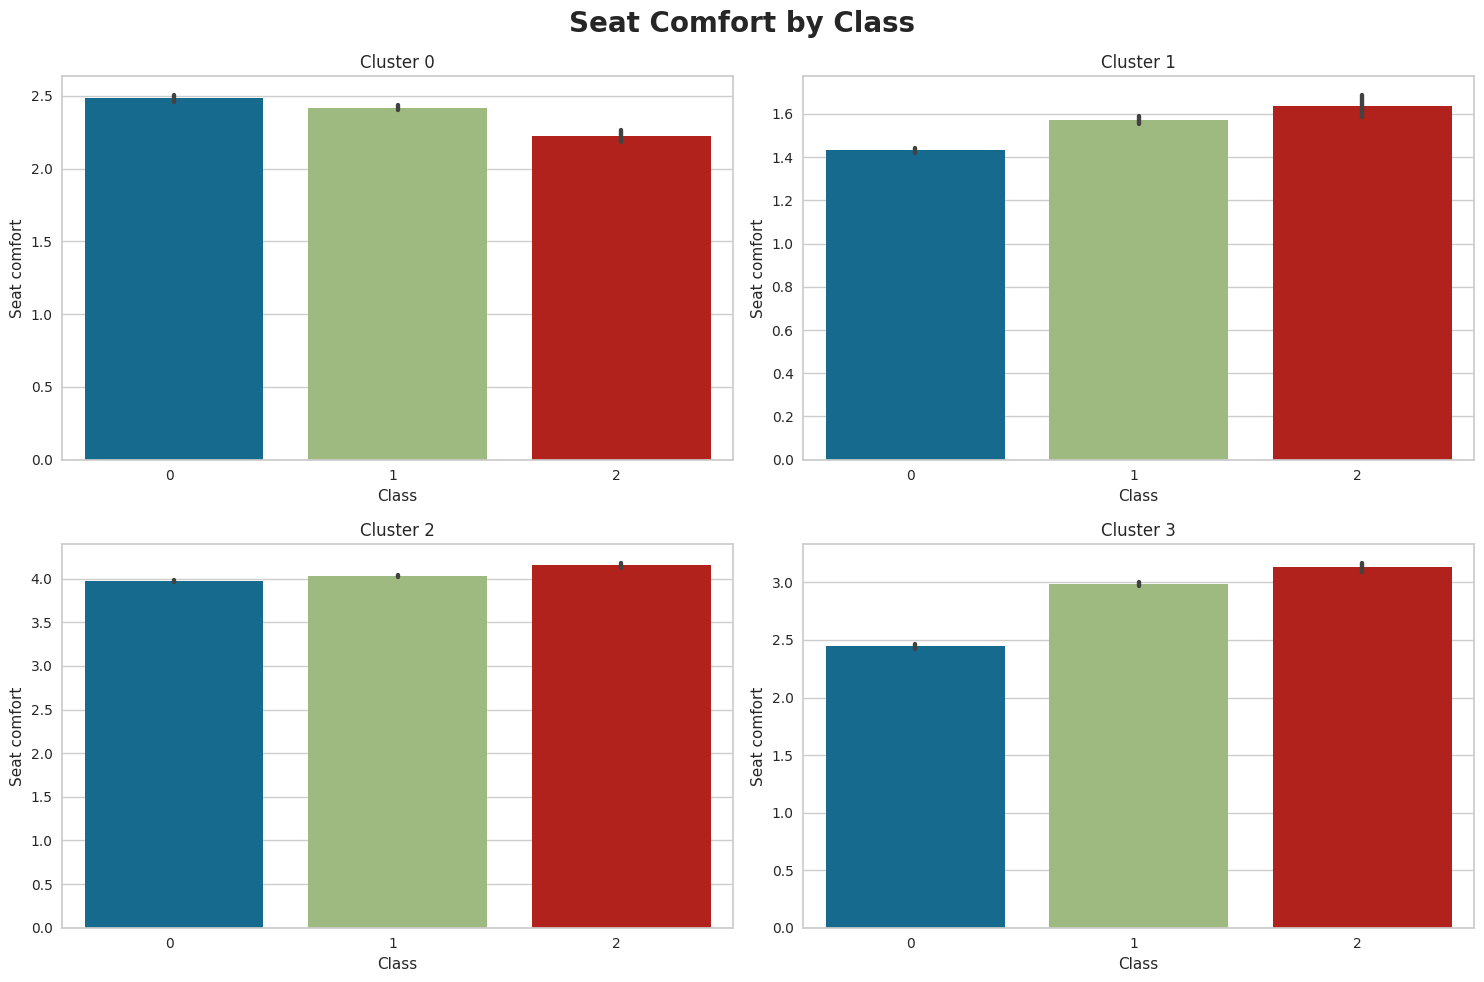

In [50]:
# Create a 2x2 subplot grid with specified figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Set a general title for the entire figure
plt.suptitle('Seat Comfort by Class', fontsize=20, fontweight='bold')

# Plot for Cluster 0
axes[0, 0].set_title('Cluster 0')
sns.barplot(x='Class', y='Seat comfort', data=cluster0, ax=axes[0, 0])
axes[0, 0].set_ylabel('Seat comfort')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), ha='right')

# Plot for Cluster 1
axes[0, 1].set_title('Cluster 1')
sns.barplot(x='Class', y='Seat comfort', data=cluster1, ax=axes[0, 1])
axes[0, 1].set_ylabel('Seat comfort')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), ha='right')

# Plot for Cluster 2
axes[1, 0].set_title('Cluster 2')
sns.barplot(x='Class', y='Seat comfort', data=cluster2, ax=axes[1, 0])
axes[1, 0].set_ylabel('Seat comfort')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), ha='right')

# Plot for Cluster 3
axes[1, 1].set_title('Cluster 3')
sns.barplot(x='Class', y='Seat comfort', data=cluster3, ax=axes[1, 1])
axes[1, 1].set_ylabel('Seat comfort')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), ha='right')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout();

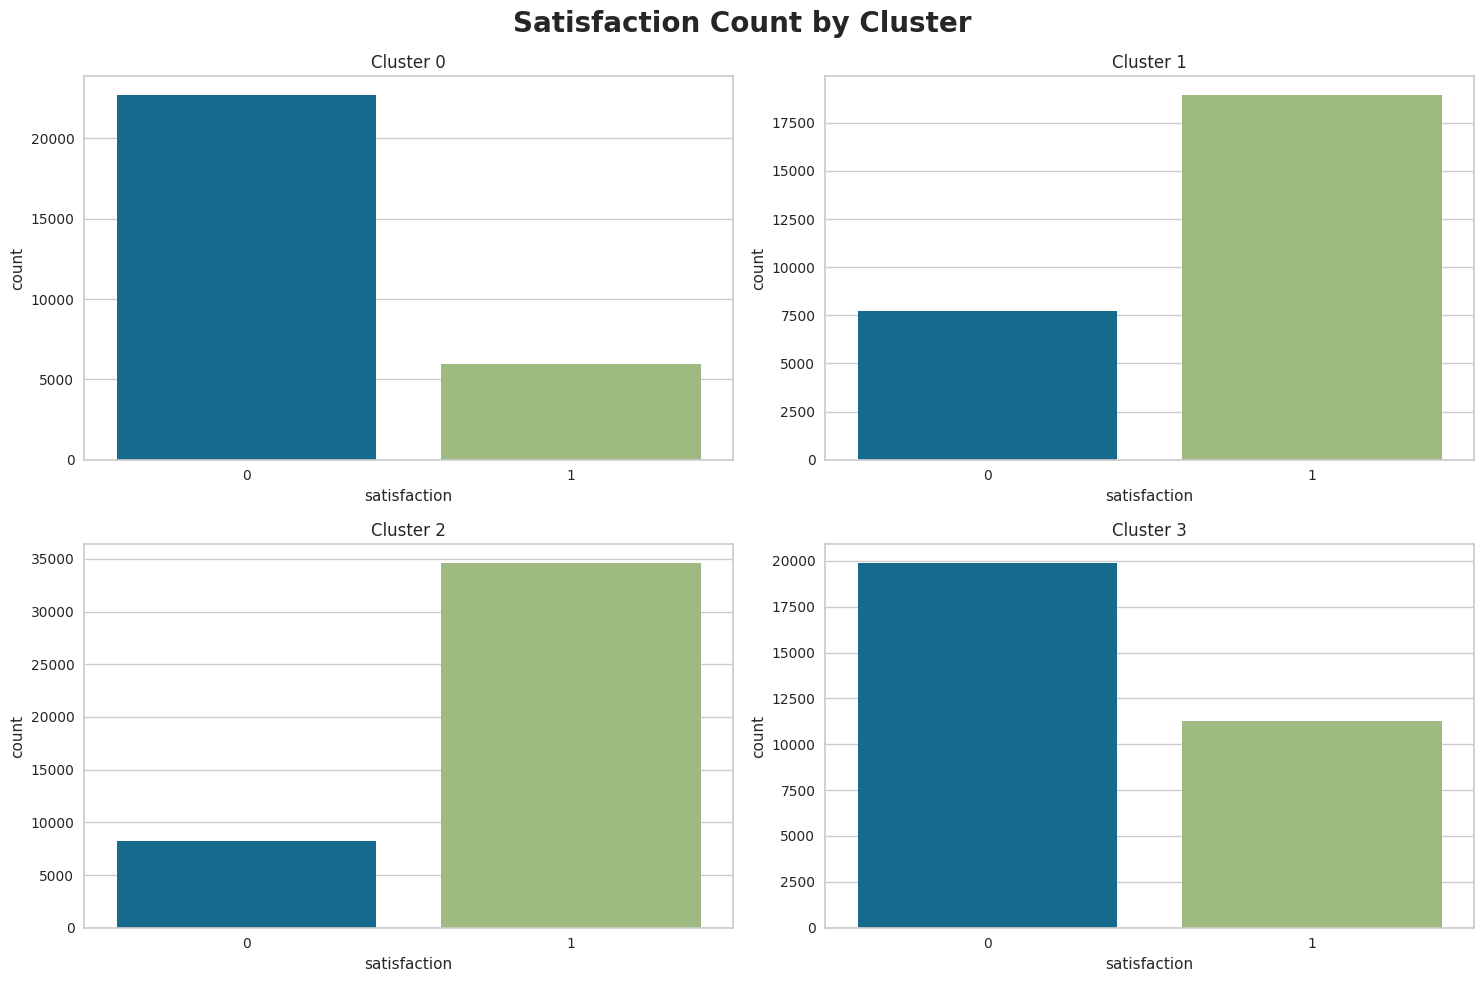

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plt.suptitle('Satisfaction Count by Cluster', fontsize=20, fontweight='bold')

axes[0, 0].set_title('Cluster 0') 
sns.countplot(x='satisfaction', data=cluster0, ax=axes[0, 0]) 
axes[0, 0].set_xlabel('satisfaction') 

axes[0, 1].set_title('Cluster 1')  
sns.countplot(x='satisfaction', data=cluster1, ax=axes[0, 1])  
axes[0, 1].set_xlabel('satisfaction')  

axes[1, 0].set_title('Cluster 2') 
sns.countplot(x='satisfaction', data=cluster2, ax=axes[1, 0])  
axes[1, 0].set_xlabel('satisfaction')  

axes[1, 1].set_title('Cluster 3') 
sns.countplot(x='satisfaction', data=cluster3, ax=axes[1, 1])
axes[1, 1].set_xlabel('satisfaction')  

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.tight_layout();

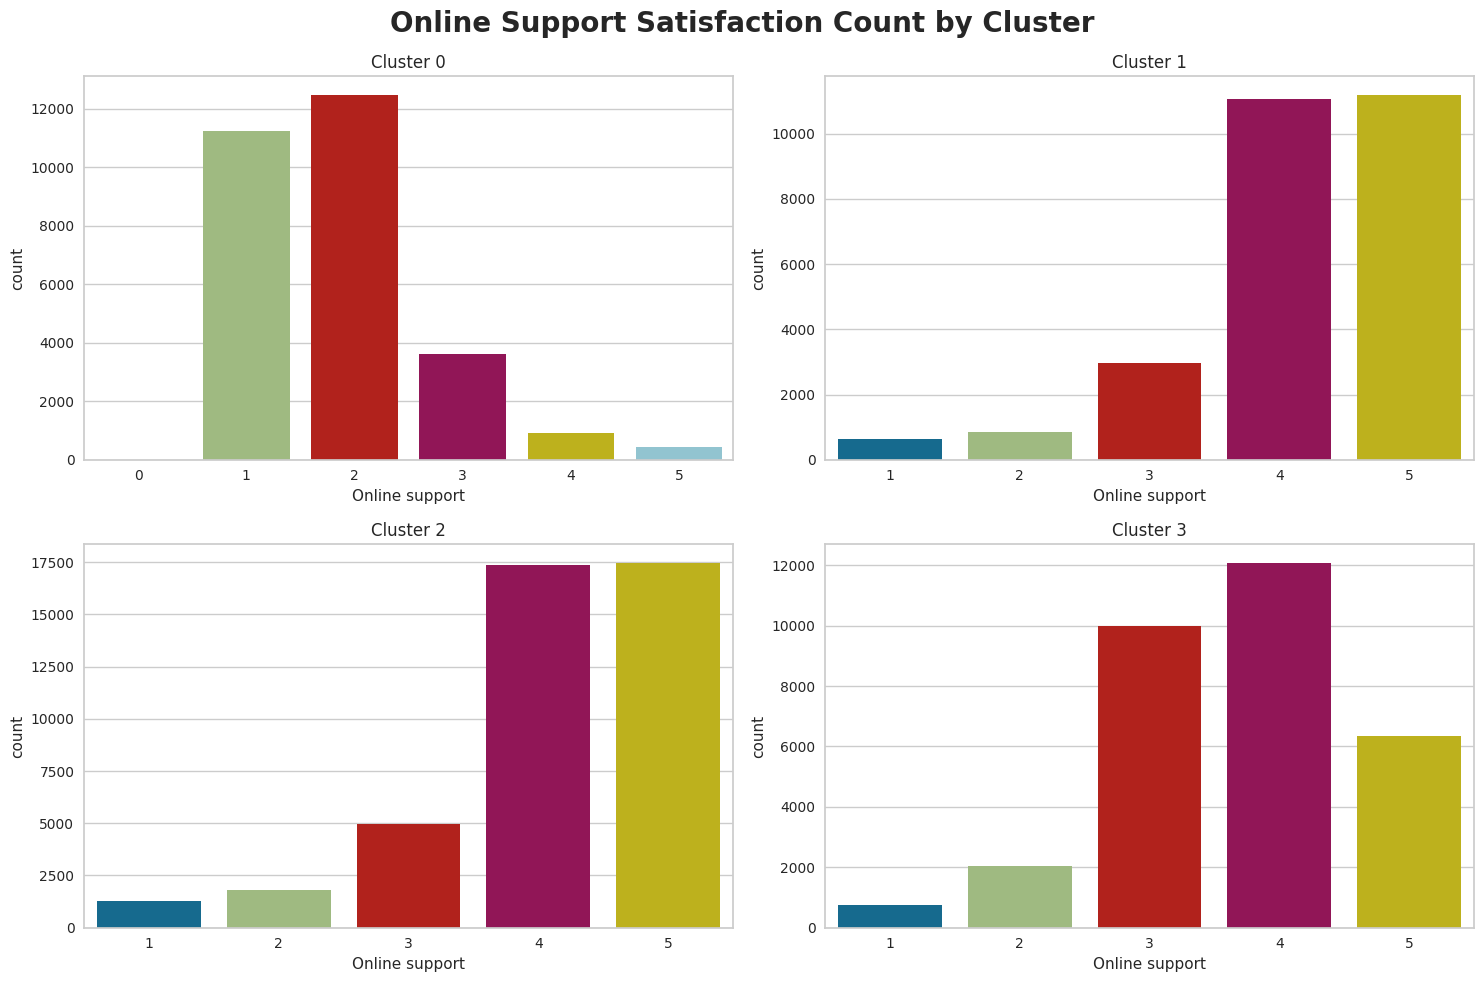

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plt.suptitle('Online Support Satisfaction Count by Cluster', fontsize=20, fontweight='bold')

axes[0, 0].set_title('Cluster 0') 
sns.countplot(x='Online support', data=cluster0, ax=axes[0, 0]) 
axes[0, 0].set_xlabel('Online support') 

axes[0, 1].set_title('Cluster 1')  
sns.countplot(x='Online support', data=cluster1, ax=axes[0, 1])  
axes[0, 1].set_xlabel('Online support')  

axes[1, 0].set_title('Cluster 2') 
sns.countplot(x='Online support', data=cluster2, ax=axes[1, 0])  
axes[1, 0].set_xlabel('Online support')  

axes[1, 1].set_title('Cluster 3') 
sns.countplot(x='Online support', data=cluster3, ax=axes[1, 1])
axes[1, 1].set_xlabel('Online support')  

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.tight_layout();

#### PCA
Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variance in the data as possible.


In [53]:
# Initialize PCA without specifying the number of components
pca = PCA()
# Fit PCA to the scaled data
pca.fit(scaled_x)
# The PCA model is fitted to the scaled data (scaled_x), allowing it to learn the underlying structure.

# This retrieves the proportion of variance explained by each principal component, helping to understand how much information is retained.
pca.explained_variance_ratio_

array([0.32252371, 0.17731881, 0.14987926, 0.07924981, 0.05616539,
       0.04833536, 0.03967751, 0.0315667 , 0.03056493, 0.02622286,
       0.02260177, 0.01589389])

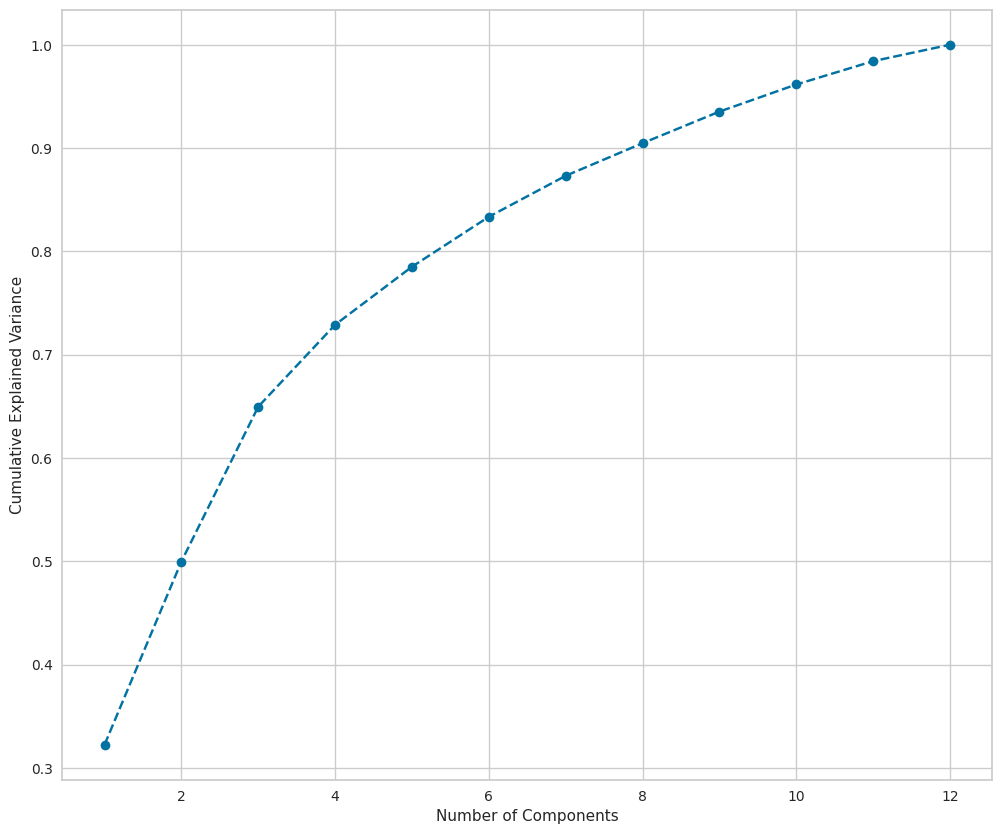

In [54]:
# Plotting the cumulative explained variance
plt.figure(figsize=(12, 10))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [55]:
# PCA is re-initialized to focus on four principal components, and the model is fitted again to capture the most important features.
pca = PCA(n_components=4)
pca.fit(scaled_x)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.32252371 0.17731881 0.14987926 0.07924981]
0.7289715899961284


The first component explains approximately 32.25% of the variance.
The second component explains about 17.73%.
The third component accounts for roughly 14.99%.
The fourth component contributes around 7.92%.

Together, these four components explain about 72.90% of the total variance in the data.

In [56]:
# Create a DataFrame to display the PCA components
df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=x.columns.values,
    index=['component 1', 'component 2', 'component 3', 'component 4'])

df_pca_components

,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
component 1,-0.1972,-0.1180,-0.2942,-0.2865,-0.3478,-0.4340,-0.2955,-0.2505,-0.2805,-0.1915,-0.2822,-0.3524
component 2,0.0727,0.0666,0.3711,0.1747,0.3199,0.0821,-0.3675,-0.3116,-0.4180,-0.1170,-0.4249,0.3346
component 3,-0.6016,-0.6508,0.1755,-0.3015,0.1527,0.1631,0.0377,-0.0167,0.0399,0.0412,0.0485,0.1888
component 4,0.1209,0.0695,0.1522,-0.2940,-0.0933,0.2598,0.0240,0.1286,0.0785,-0.8735,0.0894,0.0223


In [57]:
# Transform the scaled data to PCA space
pca_scores = pca.transform(scaled_x)

results = []

for i in range(1, 13):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)   
    results.append(kmeans_pca.inertia_)
    
results

[1132708.1312859436,
 773852.6970792436,
 639037.1265942644,
 548888.7402997615,
 495429.29987891007,
 449079.2466989006,
 416572.9259267296,
 391236.5077352368,
 368549.8732897874,
 348798.83008605364,
 330913.02120055526,
 315610.45226439653]

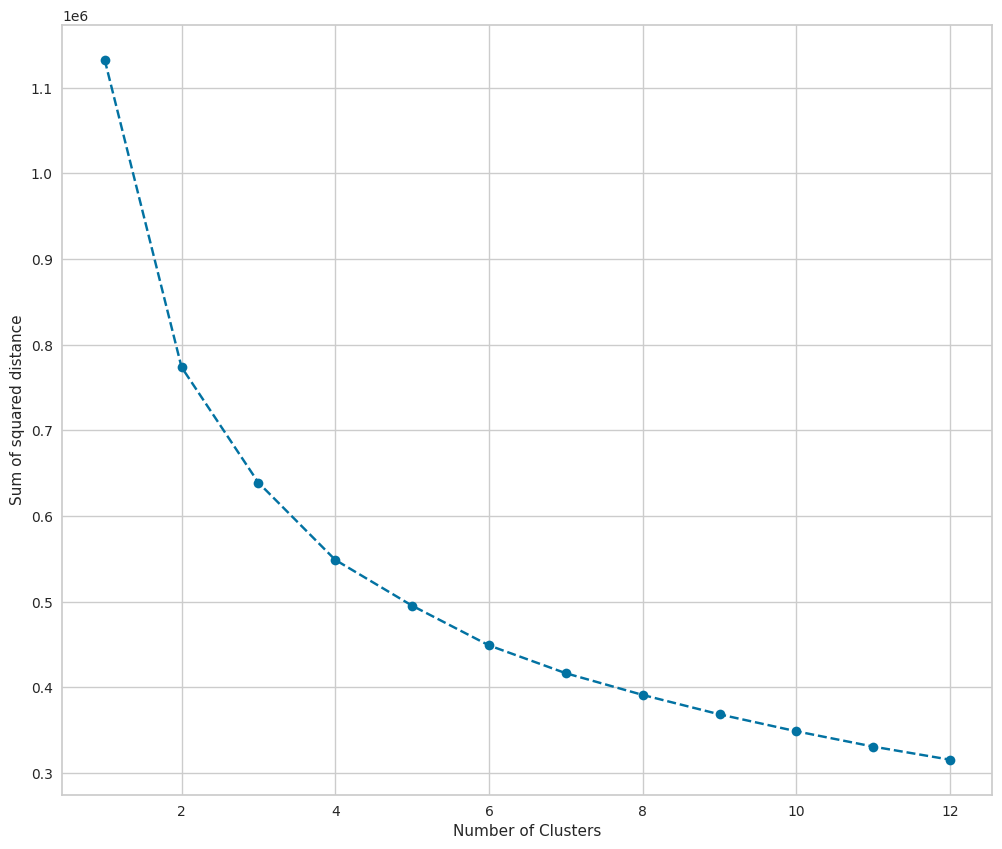

In [58]:
plt.figure(figsize=(12, 10))
plt.plot(np.arange(1,13), results, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance');

In [59]:
# Initialize the KMeans algorithm with 4 clusters
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
# Fit the model to the PCA-transformed data
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=42)

In [60]:
df_cluster_pca = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_cluster_pca.columns.values[-4:] = ['component 1', 'component 2', 'component 3','component 4']
df_cluster_pca['K-means PCA'] = kmeans_pca.labels_
df_cluster_pca

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,component 1,component 2,component 3,component 4,K-means PCA
0,1,Female,0,65,Personal Travel,1,265,0,0,0,...,5,3,2,0,0.0,2.584729,0.031410,1.805983,-2.278632,2
1,1,Male,0,47,Personal Travel,0,2464,0,0,0,...,2,3,2,310,305.0,2.661697,-2.127882,1.902249,0.491016,2
2,1,Female,0,15,Personal Travel,1,2138,0,0,0,...,4,4,2,0,0.0,2.851196,-1.911780,2.582145,-0.466822,2
3,1,Female,0,60,Personal Travel,1,623,0,0,0,...,4,1,3,0,0.0,4.081008,2.821438,1.706316,-2.251177,1
4,1,Female,0,70,Personal Travel,1,354,0,0,0,...,4,2,5,0,0.0,2.209291,2.776475,2.702247,-1.590979,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,1,Female,1,29,Personal Travel,1,1731,5,5,5,...,4,4,2,0,0.0,0.670655,-0.770874,-2.951417,-0.884396,2
129483,0,Male,1,63,Personal Travel,0,2087,2,3,2,...,1,2,1,174,172.0,3.817923,-0.358039,0.209064,1.674693,2
129484,0,Male,1,69,Personal Travel,1,2320,3,0,3,...,2,3,2,155,163.0,1.184093,-0.684631,-0.208774,1.341638,2
129485,0,Male,1,66,Personal Travel,1,2450,3,2,3,...,2,1,2,193,205.0,2.675533,0.882140,-0.469069,0.801169,1


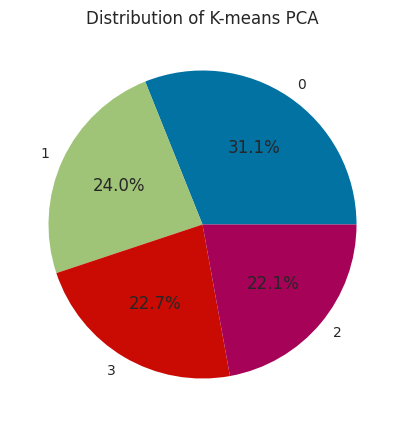

In [61]:
# Get the cluster pca counts
cluster_pca_counts = df_cluster_pca['K-means PCA'].value_counts()

# Create the Pie chart
plt.figure(figsize=(10,5))
plt.pie(cluster_pca_counts, labels=cluster_pca_counts.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Distribution of K-means PCA');

In [62]:
# Filter the DataFrame 'df_cluster_pca' to get the rows where 'K-means PCA' is 0
pca0=df_cluster_pca[df_cluster_pca['K-means PCA']==0]
# Filter the DataFrame 'df_cluster_pca' to get the rows where 'K-means PCA' is 1
pca1=df_cluster_pca[df_cluster_pca['K-means PCA']==1]
# Filter the DataFrame 'df_cluster_pca' to get the rows where 'K-means PCA' is 2
pca2=df_cluster_pca[df_cluster_pca['K-means PCA']==2]
# Filter the DataFrame 'df_cluster_pca' to get the rows where 'K-means PCA' is 3
pca3=df_cluster_pca[df_cluster_pca['K-means PCA']==3]

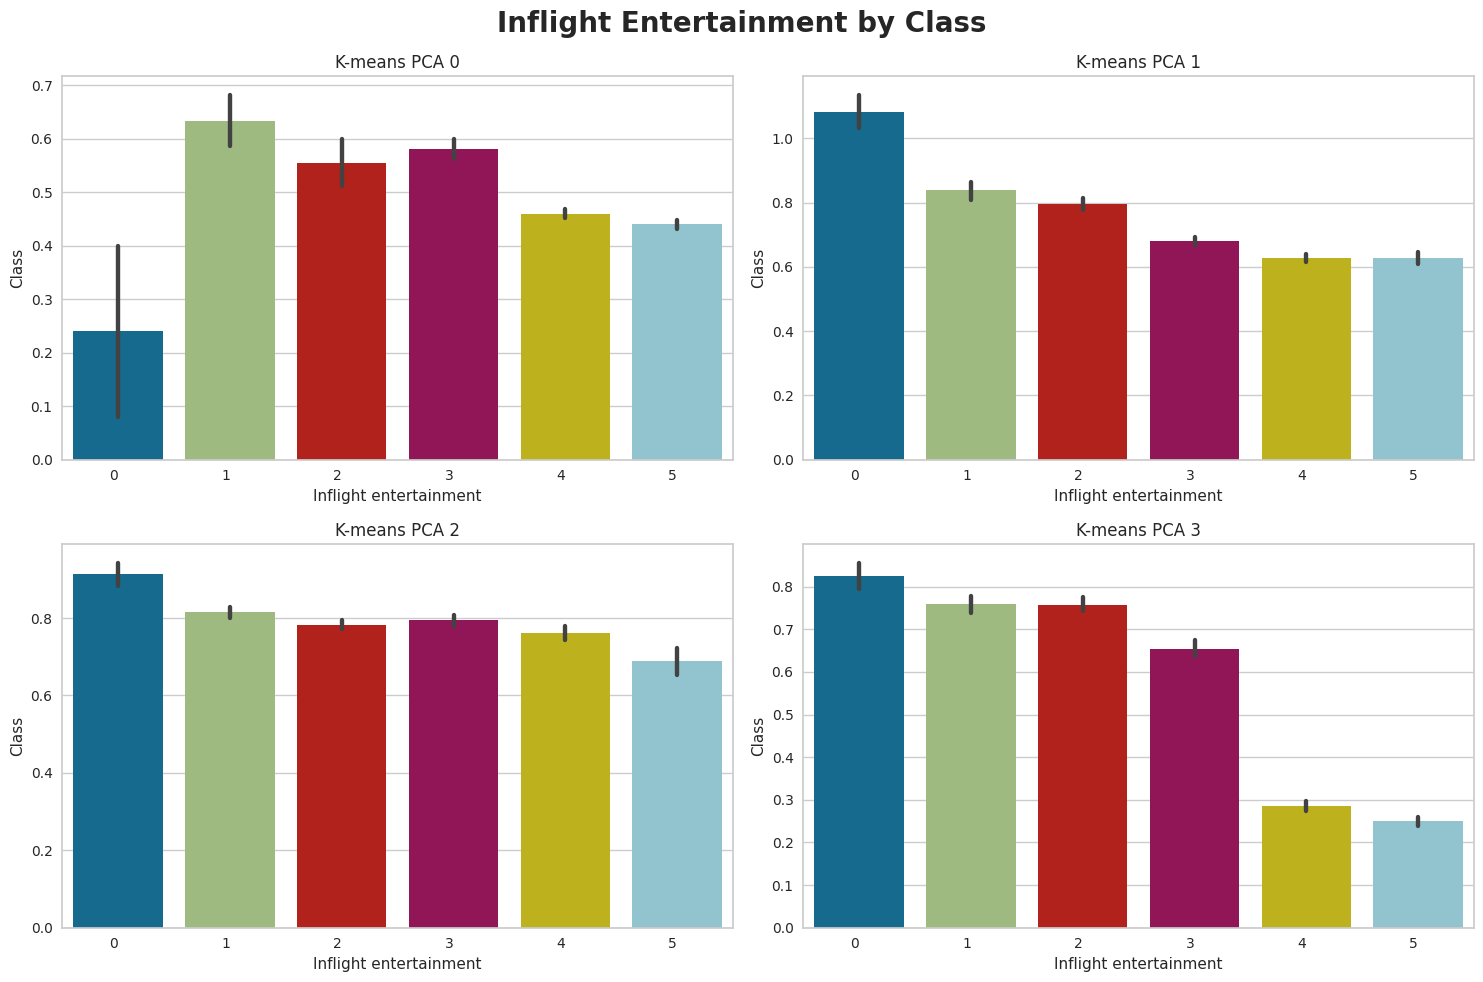

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plt.suptitle('Inflight Entertainment by Class', fontsize=20, fontweight='bold')

axes[0, 0].set_title('K-means PCA 0')
sns.barplot(x='Inflight entertainment', y='Class', data=pca0, ax=axes[0, 0])
axes[0, 0].set_xlabel('Inflight entertainment')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), ha='right')

axes[0, 1].set_title('K-means PCA 1')
sns.barplot(x='Inflight entertainment', y='Class', data=pca1, ax=axes[0, 1])
axes[0, 1].set_xlabel('Inflight entertainment')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), ha='right')

axes[1, 0].set_title('K-means PCA 2')
sns.barplot(x='Inflight entertainment', y='Class', data=pca2, ax=axes[1, 0])
axes[1, 0].set_xlabel('Inflight entertainment')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), ha='right')

axes[1, 1].set_title('K-means PCA 3')
sns.barplot(x='Inflight entertainment', y='Class', data=pca3, ax=axes[1, 1])
axes[1, 1].set_xlabel('Inflight entertainment')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), ha='right')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.tight_layout();

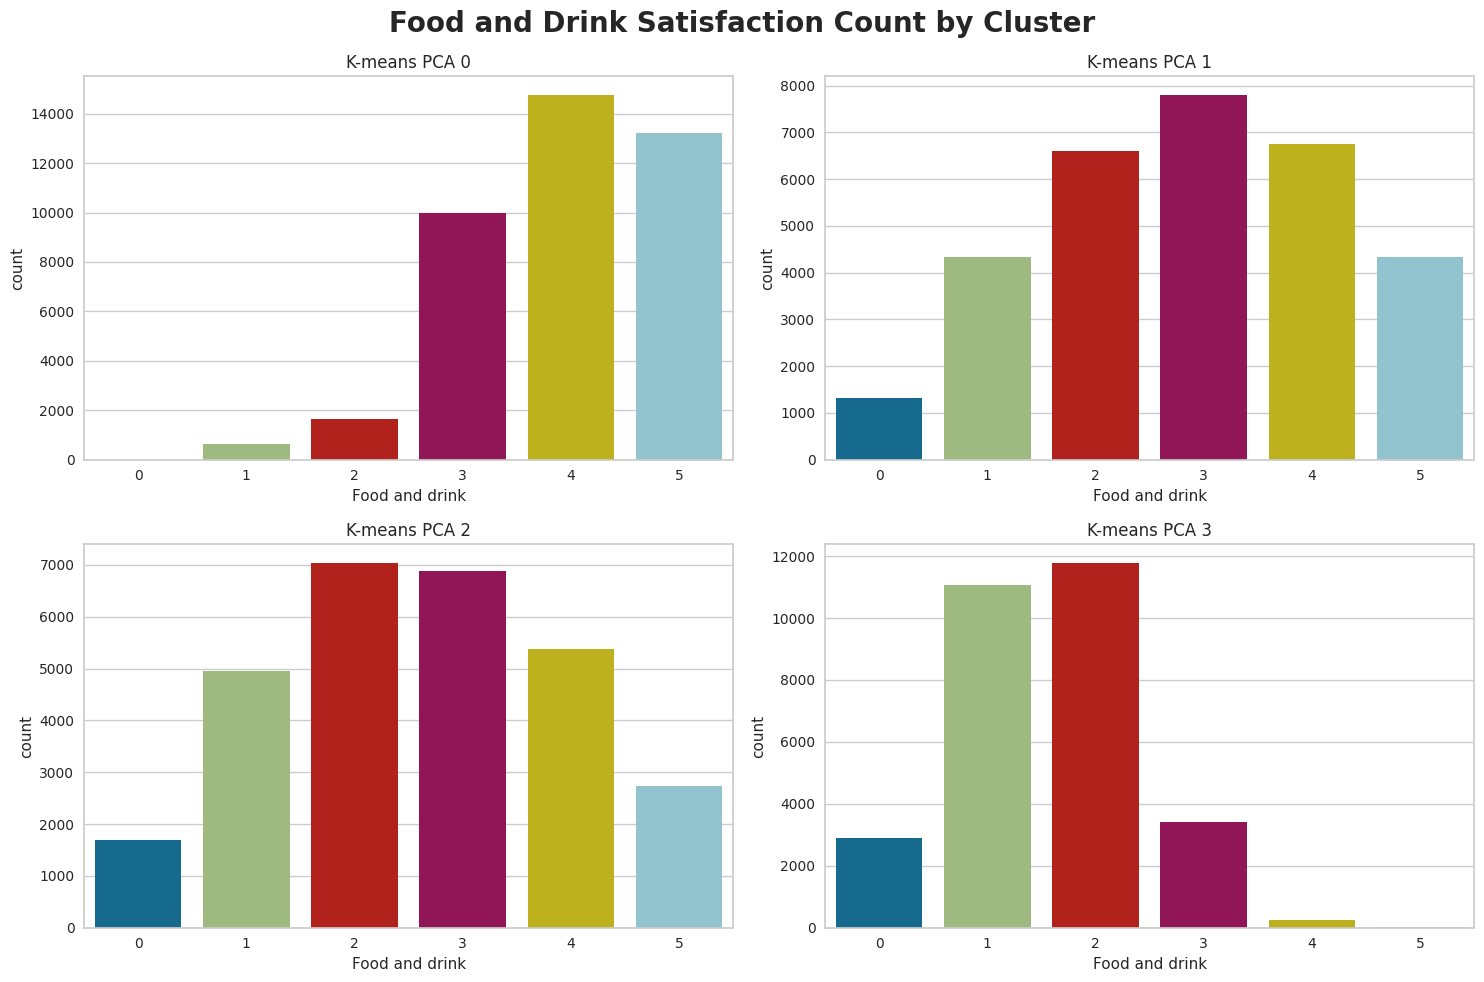

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plt.suptitle('Food and Drink Satisfaction Count by Cluster', fontsize=20, fontweight='bold')

axes[0, 0].set_title('K-means PCA 0') 
sns.countplot(x='Food and drink', data=pca0, ax=axes[0, 0]) 
axes[0, 0].set_xlabel('Food and drink') 

axes[0, 1].set_title('K-means PCA 1')  
sns.countplot(x='Food and drink', data=pca1, ax=axes[0, 1])  
axes[0, 1].set_xlabel('Food and drink')  

axes[1, 0].set_title('K-means PCA 2') 
sns.countplot(x='Food and drink', data=pca2, ax=axes[1, 0])  
axes[1, 0].set_xlabel('Food and drink')  

axes[1, 1].set_title('K-means PCA 3') 
sns.countplot(x='Food and drink', data=pca3, ax=axes[1, 1])
axes[1, 1].set_xlabel('Food and drink')  

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.tight_layout();